<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1 >Week 18 Class 1 01/25</h1>
</div>

## Objectives for this week:
* Data Structuring 
* Data Cleanup

## Todays Agenda
* Probability
* Intro to linear algebra
* Types of Data
* Data integrity and accuracy

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1 >Homework Problem</h1>
</div>

## Exercise 1:
    
Given a positive integer, check whether it has alternating bits: namely, if two adjacent bits will always have different values.

 

**Example 1:**

Input: n = 5  
Output: true  
Explanation: The binary representation of 5 is: 101  

**Example 2:**

Input: n = 7  
Output: false  
Explanation: The binary representation of 7 is: 111.  

**Example 3:**

Input: n = 11  
Output: false  
Explanation: The binary representation of 11 is: 1011.  

**Example 4:**

Input: n = 10  
Output: true  
Explanation: The binary representation of 10 is: 1010.  

**Example 5:**

Input: n = 3  
Output: false  


In [ ]:
def ex1(n):
    num = n ^ (n >> 1)
    return not(num & num+1)

print(ex1(5) == True)
print(ex1(7) == False)
print(ex1(11) == False)
print(ex1(10) == True)
print(ex1(3) == False)
print(ex1(4) == False)

try:
    assert(ex1(5) == True)
    assert(ex1(7) == False)
    assert(ex1(11) == False)
    assert(ex1(10) == True)
    assert(ex1(3) == False)
    assert(ex1(4) == False)
    print("solution is correct")
except AssertionError:
    print("solution is incorrect")

In [ ]:
bin(5), bin(5>>1), bin(5^5>>1)

In [ ]:
bin(10), bin(10>>1), bin(10^10>>1)

In [ ]:
bin(5^5>>1+1), bin(10^10>>1+1)

In [ ]:
bin(2), bin(4), bin(6), bin(8), bin(16)

In [ ]:
bin(7), bin(7+1), bin(7&7+1)

In [ ]:
def ex1_explained(n):
    # bitwise shift n
    # 0b010 -> 0b01
    bws = (n >> 1)
    # XOR it which is T if ONLY one is T
    # 0b010 ^ 0b101 -> 0b111
    num = n ^ bws
    # add 1 to num:
    # if 0b111 then 0b111 + 0b01 == 0b1000
    added = num + 1
    # logical & it (not 'and')
    # if 0b0111 & 0b1000 -> 0b0000
    anded = num & num+1
    print(f"original: {n}, binary: {bin(n)}, bws: {bin(bws)}, \
    \nxor: {bin(num)}, added: {bin(added)}, anded: {bin(anded)}\
    \nreturn value: {not(bool(anded))}\n")
    

ex1_explained(5)
ex1_explained(7)
ex1_explained(11)
ex1_explained(10)
ex1_explained(3)
ex1_explained(4)

### Interesting video about using this sort of trick

https://www.youtube.com/watch?v=p8u_k2LIZyo

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo('p8u_k2LIZyo', width=900, height=500)

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Probability Continued</h1>
</div>

In [ ]:
from fractions import Fraction

In [ ]:
def P(event, space): 
    "The probability of an event, given a sample space of equiprobable outcomes."
    return Fraction(len(event & space), 
                    len(space))

D    = {1, 2, 3, 4, 5, 6}
E = {1,2,3}
P(E,D)

In [ ]:
def cross(A, B):
    "The set of ways of concatenating one item from collection A with one from B."
    return {a + b 
            for a in A for b in B}

In [ ]:
cross('W', '1234')

In [ ]:
import itertools

def combos(items, n):
    "All combinations of n items; each combo as a concatenated str."
    return {' '.join(combo) 
            for combo in itertools.combinations(items, n)}


In [ ]:
from math import factorial

def choose(n, c):
    "Number of ways to choose c items from a list of n items."
    return factorial(n) // (factorial(n - c) * factorial(c))

In [ ]:
def P(event, space): 
    """The probability of an event, given a sample space of equiprobable outcomes.
    event can be either a set of outcomes, or a predicate (true for outcomes in the event)."""
    if is_predicate(event):
        event = such_that(event, space)
    return Fraction(len(event & space), len(space))

is_predicate = callable

def such_that(predicate, collection): 
    "The subset of elements in the collection for which the predicate is true."
    return {e for e in collection if predicate(e)}

In [ ]:
def win_unfinished_game(Hneeds, Tneeds):
    "The probability that H will win the unfinished game, given the number of points needed by H and T to win."
    def Hwins(outcome): return outcome.count('h') >= Hneeds
    return P(Hwins, continuations(Hneeds, Tneeds))

def continuations(Hneeds, Tneeds):
    "All continuations of a game where H needs `Hneeds` points to win and T needs `Tneeds`."
    rounds = ['ht' for _ in range(Hneeds + Tneeds - 1)]
    return set(itertools.product(*rounds))

In [ ]:
class ProbDist(dict):
    "A Probability Distribution; an {outcome: probability} mapping."
    def __init__(self, mapping=(), **kwargs):
        self.update(mapping, **kwargs)
        # Make probabilities sum to 1.0; assert no negative probabilities
        total = sum(self.values())
        for outcome in self:
            self[outcome] = self[outcome] / total
            assert self[outcome] >= 0

In [ ]:
def P(event, space): 
    """The probability of an event, given a sample space of equiprobable outcomes. 
    event: a collection of outcomes, or a predicate that is true of outcomes in the event. 
    space: a set of outcomes or a probability distribution of {outcome: frequency} pairs."""
    if is_predicate(event):
        event = such_that(event, space)
    if isinstance(space, ProbDist):
        return sum(space[o] for o in space if o in event)
    else:
        return Fraction(len(event & space), len(space))
    
def such_that(predicate, space): 
    """The outcomes in the sample pace for which the predicate is true.
    If space is a set, return a subset {outcome,...};
    if space is a ProbDist, return a ProbDist {outcome: frequency,...};
    in both cases only with outcomes where predicate(element) is true."""
    if isinstance(space, ProbDist):
        return ProbDist({o:space[o] for o in space if predicate(o)})
    else:
        return {o for o in space if predicate(o)}

# More Urn Problems: M&Ms and Bayes

Here's another urn problem (or "bag" problem) [from](http://allendowney.blogspot.com/2011/10/my-favorite-bayess-theorem-problems.html) prolific Python/Probability author [Allen Downey ](http://allendowney.blogspot.com/):

> The blue M&M was introduced in 1995.  Before then, the color mix in a bag of plain M&Ms was (30% Brown, 20% Yellow, 20% Red, 10% Green, 10% Orange, 10% Tan).  Afterward it was (24% Blue , 20% Green, 16% Orange, 14% Yellow, 13% Red, 13% Brown). 
A friend of mine has two bags of M&Ms, and he tells me that one is from 1994 and one from 1996.  He won't tell me which is which, but he gives me one M&M from each bag.  One is yellow and one is green.  What is the probability that the yellow M&M came from the 1994 bag?

To solve this problem, we'll first represent probability distributions for each bag: `bag94` and `bag96`:

In [ ]:
bag94 = ProbDist(brown=30, yellow=20, red=20, green=10, orange=10, tan=10)
bag96 = ProbDist(blue=24, green=20, orange=16, yellow=14, red=13, brown=13)

Next, define `MM` as the joint distribution&mdash;the sample space for picking one M&M from each bag. The outcome `'yellow green'` means that a yellow M&M was selected from the 1994 bag and a green one from the 1996 bag.

In [ ]:
def joint(A, B, sep=''):
    """The joint distribution of two independent probability distributions. 
    Result is all entries of the form {a+sep+b: P(a)*P(b)}"""
    return ProbDist({a + sep + b: A[a] * B[b]
                    for a in A
                    for b in B})

MM = joint(bag94, bag96, ' ')
MM

First we'll look at the "One is yellow and one is green" part:

In [ ]:
def yellow_and_green(outcome): return 'yellow' in outcome and 'green' in outcome

such_that(yellow_and_green, MM)

Now we can answer the question: given that we got a yellow and a green (but don't know which comes from which bag), what is the probability that the yellow came from the 1994 bag?

In [ ]:
def yellow94(outcome): return outcome.startswith('yellow')

P(yellow94, such_that(yellow_and_green, MM))

So there is a 74% chance that the yellow comes from the 1994 bag.

Answering this question was straightforward: just like all the other probability problems, we simply create a sample space, and use `P` to pick out the probability of the event in question, given what we know about the outcome.
But in a sense it is curious that we were able to solve this problem with the same methodology as the others: this problem comes from a section titled **My favorite Bayes's Theorem Problems**, so one would expect that we'd need to invoke Bayes Theorem to solve it.  The computation above shows that that is not necessary. 

![Bayes](http://img1.ph.126.net/xKZAzeOv_mI8a4Lwq7PHmw==/2547911489202312541.jpg)
<center><a href="https://en.wikipedia.org/wiki/Thomas_Bayes">Rev. Thomas Bayes</a><br>1701-1761
</center>

In [ ]:
bag94 = ProbDist(brown=30, yellow=20, red=20, green=10, orange=10, tan=10)
bag96 = ProbDist(blue=24, green=20, orange=16, yellow=14, red=13, brown=13)

Of course, we *could* solve it using Bayes Theorem. Why is Bayes Theorem recommended? Because we are asked about the probability of an event given the evidence, which is not immediately available; however the probability of the evidence given the event is.  

Before we see the colors of the M&Ms, there are two hypotheses, `A` and `B`, both with equal probability:

    A: first M&M from 94 bag, second from 96 bag
    B: first M&M from 96 bag, second from 94 bag
    P(A) = P(B) = 0.5
    
Then we get some evidence:
    
    E: first M&M yellow, second green
    
We want to know the probability of hypothesis `A`, given the evidence:
    
    P(A | E)
    
That's not easy to calculate (except by enumerating the sample space). But Bayes Theorem says:
    
    P(A | E) = P(E | A) * P(A) / P(E)
    
The quantities on the right-hand-side are easier to calculate:
    
    P(E | A) = 0.20 * 0.20 = 0.04
    P(E | B) = 0.10 * 0.14 = 0.014
    P(A)     = 0.5
    P(B)     = 0.5
    P(E)     = P(E | A) * P(A) + P(E | B) * P(B) 
             = 0.04     * 0.5  + 0.014    * 0.5   =   0.027
    
And we can get a final answer:
    
    P(A | E) = P(E | A) * P(A) / P(E) 
             = 0.04     * 0.5  / 0.027 
             = 0.7407407407
             
You have a choice: Bayes Theorem allows you to do less calculation at the cost of more algebra; that is a great trade-off if you are working with pencil and paper. Enumerating the state space allows you to do less algebra at the cost of more calculation; often a good trade-off if you have a computer. But regardless of the approach you use, it is important to understand Bayes theorem and how it works.

There is one important question that Allen Downey does not address: *would you  eat twenty-year-old M&Ms*?

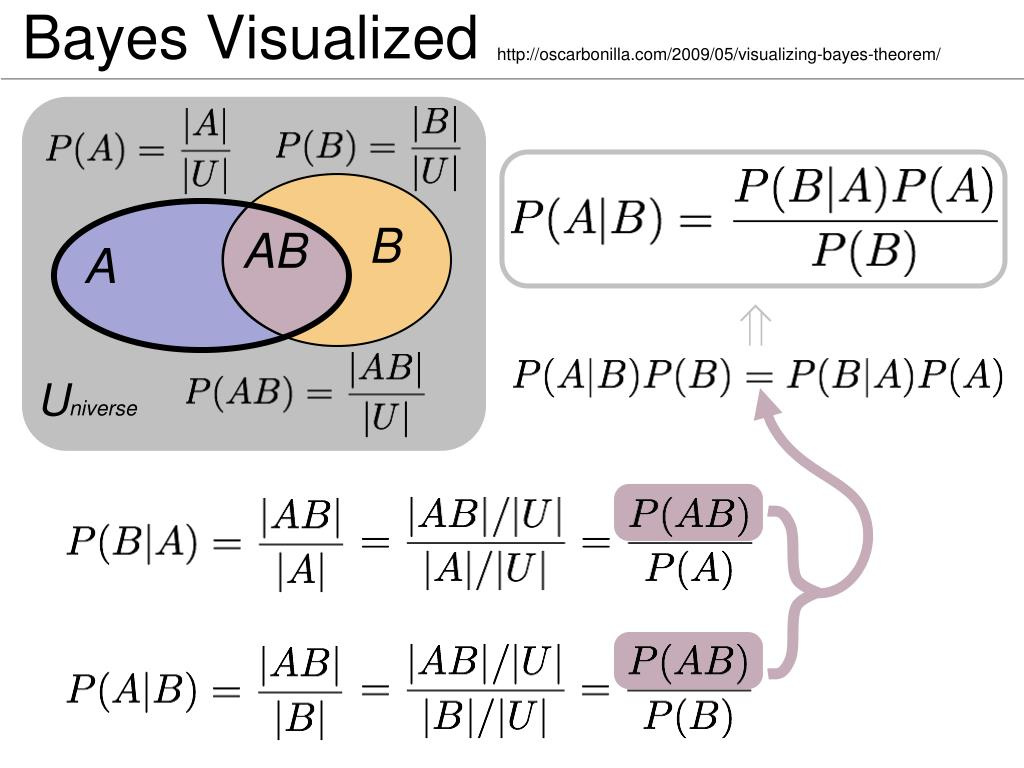

# Newton's Answer to a Problem by Pepys

<table>
<tr><td><img src="http://scienceworld.wolfram.com/biography/pics/Newton.jpg"><center><a href="https://en.wikipedia.org/wiki/Isaac_Newton">Isaac Newton</a><br>1693</center>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Samuel_Pepys_portrait.jpg/148px-Samuel_Pepys_portrait.jpg"><center><a href="https://en.wikipedia.org/wiki/Samuel_Pepys">Samuel Pepys</a><br>1693</center>
</table>

[This paper](http://fermatslibrary.com/s/isaac-newton-as-a-probabilist) explains how  Samuel Pepys wrote to Isaac Newton in 1693 to pose the problem:

> Which of the following three propositions has the greatest chance of success? 
  1. Six fair dice are tossed independently and at least one “6” appears. 
  2. Twelve fair dice are tossed independently and at least two “6”s appear. 
  3. Eighteen fair dice are tossed independently and at least three “6”s appear.
  
Newton was able to answer the question correctly (although his reasoning was not quite right); let's see how we can do. Since we're only interested in whether a die comes up as "6" or not, we can define a single die and the joint distribution over *n* dice as follows:

In [ ]:
die = ProbDist({'6':1/6, '-':5/6})

print(die)

In [ ]:
def dice(n, die):
    "Joint probability from tossing n dice."
    if n == 1:
        return die
    else:
        return joint(die, dice(n - 1, die))

In [ ]:
dice(3, die)

Now we are ready to determine which proposition is more likely to have the required number of sixes:

In [ ]:
def at_least(k, result): return lambda s: s.count(result) >= k

In [ ]:
P(at_least(1, '6'), dice(6, die))

In [ ]:
P(at_least(2, '6'), dice(12, die))

In [ ]:
P(at_least(4, '6'), dice(18, die))

We reach the same conclusion Newton did, that the best chance is rolling six dice.

<hr>

# Simulation

Sometimes it is inconvenient to explicitly define a sample space. Perhaps the sample space is infinite, or perhaps it is just very large and complicated, and we feel more confident in writing a program to *simulate* one pass through all the complications, rather than try to *enumerate* the complete sample space. *Random sampling* from the simulation
can give an accurate estimate of the probability.

# Simulating Monopoly

![](http://buckwolf.org/a.abcnews.com/images/Entertainment/ho_hop_go_050111_t.jpg)<center>[Mr. Monopoly](https://en.wikipedia.org/wiki/Rich_Uncle_Pennybags)<br>1940&mdash;

Consider [problem 84](https://projecteuler.net/problem=84) from the excellent [Project Euler](https://projecteuler.net), which asks for the probability that a player in the game Monopoly ends a roll on each of the squares on the board.  To answer this we need to take into account die rolls, chance and community chest cards, and going to jail (from the "go to jail" space, from a card, or from rolling doubles three times in a row). We do not need to take into account anything about buying or selling properties or exchanging money or winning or losing the game, because these don't change a player's location. We will assume that a player in jail will always pay to get out of jail immediately. 

A game of Monopoly can go on forever, so the sample space is infinite. But even if we limit the sample space to say, 1000 rolls, there are $21^{1000}$ such sequences of rolls (and even more possibilities when we consider drawing cards). So it is infeasible to explicitly represent the sample space.

But it is fairly straightforward to implement a simulation and run it for, say, 400,000 rolls (so the average square will be landed on 10,000 times).  Here is the code for a simulation:

In [ ]:
from collections import Counter, deque
import random

# The board: a list of the names of the 40 squares
# As specified by https://projecteuler.net/problem=84
board = """GO   A1 CC1 A2  T1 R1 B1  CH1 B2 B3
           JAIL C1 U1  C2  C3 R2 D1  CC2 D2 D3 
           FP   E1 CH2 E2  E3 R3 F1  F2  U2 F3 
           G2J  G1 G2  CC3 G3 R4 CH3 H1  T2 H2""".split()

def monopoly(steps):
    """Simulate given number of steps of Monopoly game, 
    yielding the number of the current square after each step."""
    goto(0) # start at GO
    CC_deck = Deck('GO JAIL' + 14 * ' ?')
    CH_deck = Deck('GO JAIL C1 E3 H2 R1 R R U -3' + 6 * ' ?')
    doubles = 0
    jail = board.index('JAIL')
    for _ in range(steps):
        d1, d2 = random.randint(1, 6), random.randint(1, 6)
        goto(here + d1 + d2)
        doubles = (doubles + 1) if (d1 == d2) else 0
        if doubles == 3 or board[here] == 'G2J':  
            goto(jail)
        elif board[here].startswith('CC'):
            do_card(CC_deck)
        elif board[here].startswith('CH'):
            do_card(CH_deck)
        yield here         

def goto(square):
    "Update the global variable 'here' to be square."
    global here
    here = square % len(board)
                   
def Deck(names):
    "Make a shuffled deck of cards, given a space-delimited string."
    cards = names.split()
    random.shuffle(cards)
    return deque(cards)         

def do_card(deck):
    "Take the top card from deck and do what it says."
    global here
    card = deck[0]             # The top card
    deck.rotate(-1)            # Move top card to bottom of deck
    if card == 'R' or card == 'U': 
        while not board[here].startswith(card):
            goto(here + 1)     # Advance to next railroad or utility
    elif card == '-3':
        goto(here - 3)         # Go back 3 spaces
    elif card != '?':
        goto(board.index(card))# Go to destination named on card

And the results:

In [ ]:
results = list(monopoly(400000))
results

I'll show a histogram of the squares, with a dotted red line at the average:

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt

plt.hist(results, bins=40)
avg = len(results) / 40
plt.plot([0, 39], [avg, avg], 'r--');

Another way to see the results:

In [ ]:
ProbDist(Counter(board[i] for i in results))

There is one square far above average: `JAIL`, at a little over 6%. There are four squares far below average: the three chance squares, `CH1`, `CH2`, and `CH3`, at around 1% (because 10 of the 16 chance cards send the player away from the square), and the "Go to Jail" square, square number 30 on the plot, which has a frequency of 0 because you can't end a turn there. The other squares are around 2% to 3% each, which you would expect, because 100% / 40 = 2.5%.

# The Central Limit Theorem / Strength in Numbers Theorem

So far, we have talked of an *outcome* as being a single state of the world. But it can be useful to break that state of the world down into components. We call these components **random variables**. For example, when we consider an experiment in which we roll two dice and observe their sum, we could model the situation with two random variables, one for each die. (Our representation of outcomes has been doing that implicitly all along, when we concatenate two parts of a string, but the concept of a random variable makes it official.)

The **Central Limit Theorem** states that if you have a collection of random variables and sum them up, then the larger the collection, the closer the sum will be to a *normal distribution* (also called a *Gaussian distribution* or a *bell-shaped curve*). The theorem applies in all but a few pathological cases. 

As an example, let's take 5 random variables representing the per-game scores of 5 basketball players, and then sum them together to form the team score. Each random variable/player is represented as a function; calling the function returns a single sample from the distribution:


In [ ]:
from random import gauss, triangular, choice, vonmisesvariate, uniform

def SC(): return posint(gauss(15.1, 3) + 3 * triangular(1, 4, 13)) # 30.1
def KT(): return posint(gauss(10.2, 3) + 3 * triangular(1, 3.5, 9)) # 22.1
def DG(): return posint(vonmisesvariate(30, 2) * 3.08) # 14.0
def HB(): return posint(gauss(6.7, 1.5) if choice((True, False)) else gauss(16.7, 2.5)) # 11.7
def OT(): return posint(triangular(5, 17, 25) + uniform(0, 30) + gauss(6, 3)) # 37.0

def posint(x): "Positive integer"; return max(0, int(round(x)))

And here is a function to sample a random variable *k* times, show a histogram of the results, and return the mean:

In [ ]:
from statistics import mean

def repeated_hist(rv, bins=10, k=100000):
    "Repeat rv() k times and make a histogram of the results."
    samples = [rv() for _ in range(k)]
    plt.hist(samples, bins=bins)
    return mean(samples)

The two top-scoring players have scoring distributions that are slightly skewed from normal:

In [ ]:
repeated_hist(SC, bins=range(60))

In [ ]:
repeated_hist(KT, bins=range(60))

The next two players have bi-modal distributions; some games they score a lot, some games not:

In [ ]:
repeated_hist(DG, bins=range(60))

In [ ]:
repeated_hist(HB, bins=range(60))

The fifth "player" (actually the sum of all the other players on the team) looks like this:

In [ ]:
repeated_hist(OT, bins=range(60))

Now we define the team score to be the sum of the five players, and look at the distribution:

In [ ]:
def GSW(): return SC() + KT() + DG() + HB() + OT()

repeated_hist(GSW, bins=range(70, 160, 2))

Sure enough, this looks very much like a normal distribution. The Central Limit Theorem appears to hold in this case. But I have to say "Central Limit" is not a very evocative name, so I propose we re-name this as the **Strength in Numbers Theorem**, to indicate the fact that if you have a lot of numbers, you tend to get the expected result.

# Conclusion

We've had an interesting tour and met some giants of the field: Laplace, Bernoulli, Fermat, Pascal, Bayes, Newton, ... even Mr. Monopoly and The Count.

![The Count](http://img2.oncoloring.com/count-dracula-number-thir_518b77b54ba6c-p.gif)
<center><a href="https://en.wikipedia.org/wiki/Count_von_Count">The Count</a><br>1972&mdash;</center>

The conclusion is: be explicit about what the problem says, and then methodical about defining the sample space, and finally be careful in counting the number of outcomes in the numerator and denominator. Easy as 1-2-3. 

# Let's review some of these concepts:


- **[Experiment](https://en.wikipedia.org/wiki/Experiment_(probability_theory%29):**
  An occurrence with an uncertain outcome that we can observe.
  <br>*For example, rolling a die.*
- **[Outcome](https://en.wikipedia.org/wiki/Outcome_(probability%29):**
  The result of an experiment; one particular state of the world. What Laplace calls a "case."
  <br>*For example:* `4`.
- **[Sample Space](https://en.wikipedia.org/wiki/Sample_space):**
  The set of all possible outcomes for the experiment. 
  <br>*For example,* `{1, 2, 3, 4, 5, 6}`.
- **[Event](https://en.wikipedia.org/wiki/Event_(probability_theory%29):**
  A subset of possible outcomes that together have some property we are interested in.
  <br>*For example, the event "even die roll" is the set of outcomes* `{2, 4, 6}`. 
- **[Probability](https://en.wikipedia.org/wiki/Probability_theory):**
  As Laplace said, the probability of an event with respect to a sample space is the number of favorable cases (outcomes from the sample space that are in the event) divided by the total number of cases in the sample space. (This assumes that all outcomes in the sample space are equally likely.) Since it is a ratio, probability will always be a number between 0 (representing an impossible event) and 1 (representing a certain event).
<br>*For example, the probability of an even die roll is 3/6 = 1/2.*

- **[Combinations](https://en.wikipedia.org/wiki/Combination):**  a combination is a selection of items from a collection, such that the order of selection does not matter
$$ choose(n,k) = {n \choose k} = \frac{n!}{(k!)(n-k!)} $$

- **[Permutations](https://en.wikipedia.org/wiki/Permutation):** a permutation of a set is, loosely speaking, an arrangement of its members into a sequence or linear order, or if the set is already ordered, a rearrangement of its elements. The permutations of set `{1,2,3}` are `[(1,2,3),(1,3,2),(2,1,3),(2,3,1),(3,1,2),(3,2,1)]` or `3!`.

- **[Bayes Theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem):** Bayes' theorem named after Reverend Thomas Bayes, describes the probability of an event, based on prior knowledge of conditions that might be related to the event. For example, if the risk of developing health problems is known to increase with age, Bayes' theorem allows the risk to an individual of a known age to be assessed more accurately (by conditioning it on their age) than simply assuming that the individual is typical of the population as a whole. 

https://seeing-theory.brown.edu/doc/basic-probability.pdf

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Intro to Linear Algebra</h1>
</div>

# Matrices

In mathematics, a matrix (plural matrices) is a rectangular array or table of numbers, symbols, or expressions, arranged in rows and columns. For example, the dimension of the matrix below is 2 × 3 (read "two by three"), because there are two rows and three columns: 
$$
\begin{bmatrix}
1 & 9 & -13 \\
20 & 5 & -6 \\
\end{bmatrix}
$$

This can be generalized as below:

An $m × n$ matrix: the $m$ rows are horizontal and the $n$ columns are vertical. Each element of a matrix is often denoted by a variable with two subscripts.

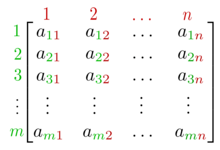

### Matrix Addition

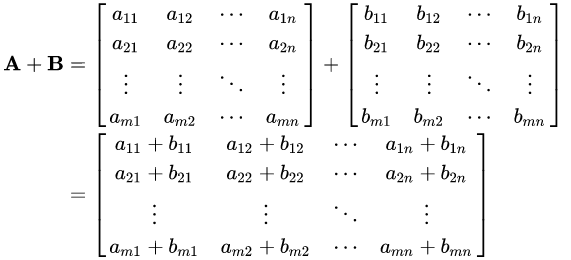

#### Example:

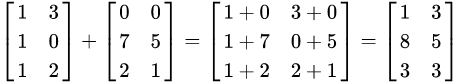

In [ ]:
import numpy as np

In [ ]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
A

In [ ]:
B = np.array([[9,8,7],[6,5,4],[3,2,1]])
B

In [ ]:
A + B

# Scalar Multiplication

Scalar multiplication is one of the basic operations defining a vector space in linear algebra (or more generally, a module in abstract algebra). In common geometrical contexts, scalar multiplication of a real Euclidean vector by a positive real number multiplies the magnitude of the vector—without changing its direction.

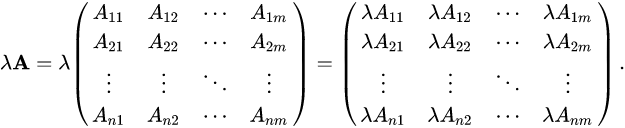

In [ ]:
C = np.array([[1,1,1],[1,1,1],[1,1,1]])
C

In [ ]:
C * 3.14

### Transpose of a matrix

The transpose of a matrix is an operator which flips a matrix over its diagonal; that is, it switches the row and column indices of the matrix A by producing another matrix, often denoted by $A^T$ (among other notations)

#### Examples

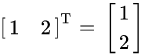

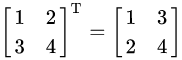

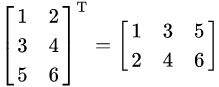

In [ ]:
D = np.array([[1,2], [3,4], [5,6]])
D

In [ ]:
D.T

### Dot product of matrices

The dot product or scalar product is an algebraic operation that takes two equal-length sequences of numbers (usually coordinate vectors), and returns a single number. In Euclidean geometry, the dot product of the Cartesian coordinates of two vectors is widely used. 

   
Expressing the above example in this way, a 1 × 3 matrix (row vector) is multiplied by a 3 × 1 matrix (column vector) to get a 1 × 1 matrix that is identified with its unique entry: 
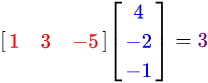

In [ ]:
A = np.array([1,3,-5])
A.shape

In [ ]:
B = np.array([[4,-2,-1]])
B.shape

In [ ]:
A.dot(B)

In [ ]:
A.dot(B.T)

# Identity Matrices

In linear algebra, the identity matrix (sometimes ambiguously called a unit matrix) of size $n$ is the $n × n$ square matrix with ones on the main diagonal and zeros elsewhere. 

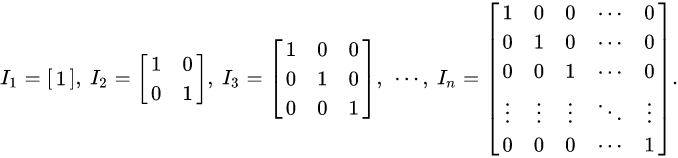


In [ ]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
A

In [ ]:
I = np.eye(3,3)
I

In [ ]:
not_I = np.ones(9).reshape(3,3)
not_I

In [ ]:
A.dot(not_I)

In [ ]:
A.dot(I)

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Data: Types, Integrity and Accuracy</h1>
</div>

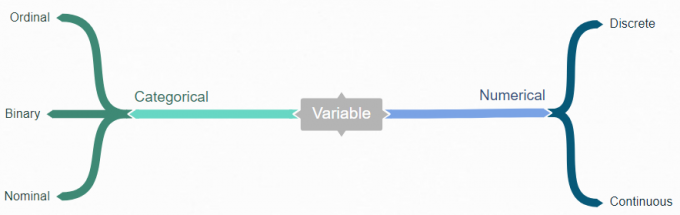

### Numerical
**Numerical data** is information that is measurable, and it is, of course, data represented as numbers and not words or text.

**Continuous numbers** are numbers that don’t have a logical end to them. Examples include variables that represent money or height.

**Discrete numbers** are the opposite; they have a logical end to them. Some examples include variables for days in the month, or number of bugs logged.

# Categorical  

For categorical data, this is any data that isn’t a number, which can mean a string of text or date. These variables can be broken down into nominal and ordinal values, though you won’t often see this done.

**Ordinal values** are values that have a set order to them. Examples of ordinal values include having a priority on a bug such as “Critical” or “Low” or the ranking of a race as “First” or “Third”. Nominal values are the opposite of ordinal values, and they represent values with no set order to them. Nominal value examples include variables such as “Country” or “Marital Status”.

In addition to ordinal and nominal values, there is a special type of categorical data called **binary**. Binary data types only have two values – yes or no. This can be represented in different ways such as “True” and “False” or 1 and 0. Binary data is used heavily for classification machine learning models. Examples of binary variables can include whether a person has stopped their subscription service or not, or if a person bought a car or not.

### Where to get data?

There are lots of way to get data, and lots of places to get it from. Typically, most of this data will be accessed through the internet, in one way or another, especially when pursuing indepent research projects.
Institutional Access

If you are working with data as part of an institution, such as a company of research lab, the institution will typically have data it needs analyzing, that it collects in various ways. Keep in mind that even people working inside institutions, with access to local data, will data still seek to find and incorporate external datasets.
Data Repositories

Data repositories are databases from which you can download data. Some data repositories allow you to explore available datasets and download datasets in bulk. Others may also offer APIs, through which you can request specific data from particular databases.
Web Scraping

The web itself is full of unstructured data. Web scraping can be done to directly extract and collect data directly from websites.
Asking People for Data

Not all data is indexed or accessible on the web, at least not publicly. Sometimes finding data means figuring out if any data is available, figuring out where it might be, and then reaching out and asking people directly about data access. If there is some particular data you need, you can try to figure out who might have it, and get in touch to see if it might be available.
Data Gathering Skills

Depending on your gathering method, you will likely have to do some combination of the following:
* Direct download data files from repositories
* Query databases & use APIs to extract and collect data of interest
* Ask people for data, and going to pick up data with a harddrive

Ultimately, the goal is collect and curate data files, hopefully structured, that you can read into Python.


### Structured and Unstructured data

**Structured Data**

Structured data is the data which conforms to a data model, has a well define structure, follows a consistent order and can be easily accessed and used by a person or a computer program.

Structured data is usually stored in well-defined schemas such as Databases. It is generally tabular with column and rows that clearly define its attributes.

SQL (Structured Query language) is often used to manage structured data stored in databases.

Characteristics of Structured Data:
* Data conforms to a data model and has easily identifiable structure
* Data is stored in the form of rows and columns (example : Database)
* Data is well organised so, Definition, Format and Meaning of data is explicitly known
* Data resides in fixed fields within a record or file
* Similar entities are grouped together to form relations or classes
* Entities in the same group have same attributes
* Easy to access and query, So data can be easily used by other programs
* Data elements are addressable, so efficient to analyse and process

**Unstructured Data**

Unstructured data is everywhere. In fact, most individuals and organizations conduct their lives around unstructured data. Just as with structured data, unstructured data is either machine generated or human generated.

Here are some examples of machine-generated unstructured data:
* Satellite images: This includes weather data or the data that the government captures in its satellite surveillance imagery. Just think about Google Earth, and you get the picture.
* Scientific data: This includes seismic imagery, atmospheric data, and high energy physics.
* Photographs and video: This includes security, surveillance, and traffic video.
* Radar or sonar data: This includes vehicular, meteorological, and oceanographic seismic profiles.

The following list shows a few examples of human-generated unstructured data:
* Text internal to your company: Think of all the text within documents, logs, survey results, and e-mails. Enterprise information actually represents a large percent of the text information in the world today.
* Social media data: This data is generated from the social media platforms such as YouTube, Facebook, Twitter, LinkedIn, and Flickr.
* Mobile data: This includes data such as text messages and location information.
* website content: This comes from any site delivering unstructured content, like YouTube, Flickr, or Instagram.

### Why does unstructured data matter?

**Because 80% of the data in companies is unstructured**, organizations need to understand the types of unstructured data they are accumulating and the best ways to process and store this data for business advantages. Without data management strategies and guidance in these areas, companies run the risks of not capitalizing on unstructured data, failing to keep up with competitors, or storing more unstructured data than they really need, thereby running up data center costs.

In a majority of cases, unstructured data is ultimately related back to the company's structured data records. As an example, every x-ray or MRI image for a patient is related back to the patient's record in the hospital's record system. The patient record in the record system is enriched with unstructured data that is linked to it, and the doctor gets a more complete picture of the patient.

This is the value of unstructured data: It enriches corporate data and enables leaders to work smarter.

### Ways you can deal with unstructured data:
[source](https://www.ironmountain.com/blogs/2020/4-ways-to-deal-with-unstructured-data)

1. Throw It Away

The reality is that much of the data organizations collect isn’t very interesting or useful, but it still takes up a lot of storage space. Devices such as smart cameras and machine sensors create huge amounts of data, little of which is needed if everything is operating normally. Rather than storing all that data, a better solution is evaluating it before it hits the network and discarding what isn’t needed. Edge computing, a type of distributed processing that makes decisions close to where data is gathered, is a promising way to do just that.

Edge AI is a special category of artificial intelligence that’s specifically intended to make decisions requiring immediate attention, such as controlling the brakes of a car or determining the likelihood that a machine is about to fail, according to Forbes. Edge AI can also be used to scour data streams and quickly identify what:
* Can be discarded.
* Requires immediate attention.
* Should be stored for analysis.

There are high hopes for edge computing; many researchers expect the market to grow more than 30% annually for the next several years, according to Allied Market Research.

2. Deduplicate It

Have you ever been on the distribution list of a mass email that included a 15-megabyte PowerPoint attachment? Organizations generate an enormous amount of duplicate data, so much so that a 2013 IDC study estimated that companies spend $44 billion annually to store copies of data they already have. This situation has likely only grown since then.

High-speed, in-line deduplication can flag duplicate records and either hold them for review or delete them automatically. While savings vary when using this method, it led to more than a 10 times reduction in storage space for two-thirds of the companies in an Enterprise Strategy Group survey shared by TechTarget.

3. Tier It

If your organization treats all data the same, it’s flushing money down the drain. Only a tiny percentage of data is typically mission-critical enough that it needs to be instantly available on expensive storage media. Most data can be relegated to spinning disks or tape. Tiered storage automatically assigns data to the most appropriate storage medium based upon policies, which often results in significant savings.

Horison Information Strategies estimates that between 63% and 85% of a typical organization’s data can be moved to secondary or long-term storage without impacting operations. If your organization isn’t moving infrequently accessed data from disk to tape or from cloud to tape, you should take a fresh look at this low-cost archival option.

Tape is the most cost-effective storage medium and its retrieval times are approaching that of disk, thanks to recent advances in technology such as redundant arrays of independent tape. What’s more, tape is stored offline, making it nearly impervious to malware attacks. Additionally, cloud services can archive data to tape automatically, which can help you save big while still retaining ready access to your data.

4. Structure It

Machine learning algorithms are great at finding patterns, including those in unstructured data sources such as text documents and images. By repeatedly scanning similar documents with some human oversight, machines can quickly figure out that a sequence of digits is more likely to be a Social Security number than a phone number or the identities of people in a photo or video. This semi-structured data can then be loaded into databases for analytical processing.

When deciding how to deal with unstructured data, look to cloud and tape for ideas. Deduplicating data helps minimize how much data is stored and AI helps with information processing and analysis, but cloud to tape storage ensures your data is protected in the most secure, accessible and cost-effective manner possible.

### Dirty Data

Dirty data, also known as rogue data, are inaccurate, incomplete or inconsistent data, especially in a computer system or database.

Dirty data can contain such mistakes as spelling or punctuation errors, incorrect data associated with a field, incomplete or outdated data, or even data that has been duplicated in the database. They can be cleaned through a process known as data cleansing.

### Data cleansing

Data cleansing or data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data. Data cleansing may be performed interactively with data wrangling tools, or as batch processing through scripting.

After cleansing, a data set should be consistent with other similar data sets in the system. The inconsistencies detected or removed may have been originally caused by user entry errors, by corruption in transmission or storage, or by different data dictionary definitions of similar entities in different stores. Data cleaning differs from data validation in that validation almost invariably means data is rejected from the system at entry and is performed at the time of entry, rather than on batches of data. 

### Requisites of quality data

High-quality data needs to pass a set of quality criteria. Those include:
* **Validity**: The degree to which the measures conform to defined business rules or constraints (see also Validity (statistics)). When modern database technology is used to design data-capture systems, validity is fairly easy to ensure: invalid data arises mainly in legacy contexts (where constraints were not implemented in software) or where inappropriate data-capture technology was used (e.g., spreadsheets, where it is very hard to limit what a user chooses to enter into a cell, if cell validation is not used). Data constraints fall into the following categories:
  + Data-Type Constraints – e.g., values in a particular column must be of a particular data type, e.g., Boolean, numeric (integer or real), date, etc.
  + Range Constraints: typically, numbers or dates should fall within a certain range. That is, they have minimum and/or maximum permissible values.
  + Mandatory Constraints: Certain columns cannot be empty.
  +  Unique Constraints: A field, or a combination of fields, must be unique across a dataset. For example, no two persons can have the same social security number.
  + Set-Membership constraints: The values for a column come from a set of discrete values or codes. For example, a person's gender may be Female, Male or Unknown (not recorded).
  + Foreign-key constraints: This is the more general case of set membership. The set of values in a column is defined in a column of another table that contains unique values. For example, in a US taxpayer database, the "state" column is required to belong to one of the US's defined states or territories: the set of permissible states/territories is recorded in a separate State table. The term foreign key is borrowed from relational database terminology.
  + Regular expression patterns: Occasionally, text fields will have to be validated this way. For example, phone numbers may be required to have the pattern (999) 999-9999.
  + Cross-field validation: Certain conditions that utilize multiple fields must hold. For example, in laboratory medicine, the sum of the components of the differential white blood cell count must be equal to 100 (since they are all percentages). In a hospital database, a patient's date of discharge from the hospital cannot be earlier than the date of admission.
* **Accuracy**: The degree of conformity of a measure to a standard or a true value - see also Accuracy and precision. Accuracy is very hard to achieve through data-cleansing in the general case because it requires accessing an external source of data that contains the true value: such "gold standard" data is often unavailable. Accuracy has been achieved in some cleansing contexts, notably customer contact data, by using external databases that match up zip codes to geographical locations (city and state) and also help verify that street addresses within these zip codes actually exist.
* **Completeness**: The degree to which all required measures are known. Incompleteness is almost impossible to fix with data cleansing methodology: one cannot infer facts that were not captured when the data in question was initially recorded. (In some contexts, e.g., interview data, it may be possible to fix incompleteness by going back to the original source of data, i.e. re-interviewing the subject, but even this does not guarantee success because of problems of recall - e.g., in an interview to gather data on food consumption, no one is likely to remember exactly what one ate six months ago. In the case of systems that insist certain columns should not be empty, one may work around the problem by designating a value that indicates "unknown" or "missing", but the supplying of default values does not imply that the data has been made complete.)
* **Consistency**: The degree to which a set of measures are equivalent in across systems (see also Consistency). Inconsistency occurs when two data items in the data set contradict each other: e.g., a customer is recorded in two different systems as having two different current addresses, and only one of them can be correct. Fixing inconsistency is not always possible: it requires a variety of strategies - e.g., deciding which data were recorded more recently, which data source is likely to be most reliable (the latter knowledge may be specific to a given organization), or simply trying to find the truth by testing both data items (e.g., calling up the customer).
* **Uniformity**: The degree to which a set data measures are specified using the same units of measure in all systems ( see also Unit of measure). In datasets pooled from different locales, weight may be recorded either in pounds or kilos and must be converted to a single measure using an arithmetic transformation.

The term **integrity** encompasses accuracy, consistency and some aspects of validation  but is rarely used by itself in data-cleansing contexts because it is insufficiently specific. (For example, "referential integrity" is a term used to refer to the enforcement of foreign-key constraints above.) 


### Data Integrity

Data integrity is the maintenance of, and the assurance of, data accuracy and consistency over its entire life-cycle and is a critical aspect to the design, implementation, and usage of any system that stores, processes, or retrieves data. The term is broad in scope and may have widely different meanings depending on the specific context – even under the same general umbrella of computing. It is at times used as a proxy term for data quality, while data validation is a pre-requisite for data integrity. Data integrity is the opposite of data corruption. The overall intent of any data integrity technique is the same: ensure data is recorded exactly as intended (such as a database correctly rejecting mutually exclusive possibilities). Moreover, upon later retrieval, ensure the data is the same as when it was originally recorded. In short, data integrity aims to prevent unintentional changes to information. Data integrity is not to be confused with data security, the discipline of protecting data from unauthorized parties. 